In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
from scipy.special import roots_laguerre


**4)** Escribir el polinomio $p(x) = 3 + 5x + x^2$ en la base de Legendre. 

In [46]:
x = sym.Symbol('x',real=True)

#Código que genera los polinomios de Legendre

#Primeros polinomios de Legendre
p0 = 1
p1 = x
Legendre_polynomy = [p0,p1]

#Demás grados de polinomio
for i in range(2,3):
    Legendre_basis = ((2*i-1)*(x*p1) - (i-1)*p0) / i
    Legendre_polynomy.append(Legendre_basis)
    p0 = p1
    p1 = Legendre_basis

#Código para escribir el polinomio propio en base de Legendre
polynomy = x**2 + 5*x +3
coefficient = np.zeros(3)

for i in range(0,3):
    Multiplication = polynomy * Legendre_polynomy[i]
    Integral = sym.integrate(Multiplication,(x, -1, 1))
    a = Fraction(float(Integral*((2*i+1)/2)))
    coefficient[i] = a

print("El polinomio escrito en la base de Legendre es ({})p_0(x) +({})p_1(x)+({})p_2(x)".format(coefficient[0],coefficient[1],coefficient[2]) )
     

El polinomio escrito en la base de Legendre es (3.3333333333333335)p_0(x) +(5.0)p_1(x)+(0.6666666666666666)p_2(x)


In [47]:
#punto 8 cap derivacion

h=0.01
x = np.linspace(0.1,1.1,100)

def f(x):
    return np.sqrt(np.tan(x))


**c)** Para $f(x) = \sqrt tan(x)$ estimar la derivada progresiva de orden $\sigma(h^2)$ en el intervalo $[0.1, 1.1]$ con $h = 0.01$.

In [48]:
def derivate_progresive(x):
    return (1/(2*h))*(-3*f(x) + 4*f(x + h) - f(x + (2*h))) 

num1 = (np.sum(derivate_progresive(x))) / 100
print("El valor estimado para la derivada progresiva de f(x) en dicho punto es:",num1)

El valor estimado para la derivada progresiva de f(x) en dicho punto es: 1.090426943319555


**d)** Para $f(x) = \sqrt tan(x)$ estimar la derivada central de orden $\sigma(h^2)$ en el intervalo $[0.1, 1.1]$ con $h = 0.01$.

In [49]:
def derivate_central(x):
    return (f(x+h) - f(x-h)) / (2*h)

num2 = (np.sum(derivate_central(x))) / 100
print("El valor estimado para la derivada central de f(x) en dicho punto es:",num2)

El valor estimado para la derivada central de f(x) en dicho punto es: 1.091054631918836


**e)** Calcule analíticamente la derivada de la función $f(x)$ y grafique con la estimación central y progresiva de orden $\sigma(h^2)$.

In [50]:
def derivate_analitic(x):
    return ((np.tan(x))**2 +1) / (2*np.sqrt(np.tan(x)))

num3 = (np.sum(derivate_analitic(x))) / 100
print("El valor estimado para la derivada analítica de f(x) en dicho punto es:",num3)

El valor estimado para la derivada analítica de f(x) en dicho punto es: 1.0908375524407108


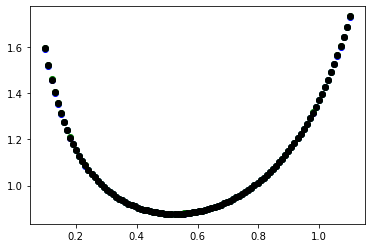

In [51]:
plt.scatter(x,derivate_progresive(x), color='b')
plt.scatter(x,derivate_central(x), color='g')
plt.scatter(x,derivate_analitic(x), color='k')


**f)** Grafique el error nodal para ambas aproximaciones.

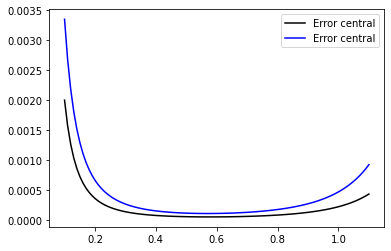

In [52]:
x = np.linspace(0.1,1.1,100)
error_progresive = np.zeros_like(x)
error_central = np.zeros_like(x)

for i in range(len(x)):
    error_progresive[i] = np.abs(derivate_progresive(x[i]) - derivate_analitic(x[i]))
    error_central[i] = np.abs(derivate_central(x[i]) - derivate_analitic(x[i]))
    
    
plt.plot(x,error_central, color='k',label='Error central')
plt.plot(x,error_progresive, color='b',label='Error central')
plt.legend()
plt.show()
    

**17)** **$\verb|(Python)|$** In the black-body radiation problem the following integral appears:

$$\int_{0}^{\infty} \frac{x^3}{e^x - 1}\mathrm{d}x = \frac{\pi^4}{15}.$$

**(a)** Compute this integral using the Gauss-Laguerre quadrature method for $n = 3$ evaluation
points.

Para este caso, debemos hallar las raíces y pesos para la cuadratura Gauss-Laguerre implementando el método de Newton-Rhapson. En primer lugar, generaremos los polinomios de Laguerre de grado 3 y hallaremos sus respectivas raíces reales. Dado este resultado podemos hallar los pesos de la cuadratura dados por la ecuación,

$$w_k = \frac{x_k}{(n + 1)^2 \cdot [L_{n + 1}(x_{k})]^2}$$

Donde $x_i$ son las raíces del polinomio de grado n de Laguerre. Con esto, la integral se podría aproximar a partir de la siguiente expresión,

$$ \int_{0}^{∞} f(x)e^{-x} = \sum_{i=1}^{n} w_if(x_i)$$

Sin embargo, nótese que la función evaluada por la integral debe estar acompañada de la expresión $e^{-x}$. Por ello, modificaremos la función dada para que cumpla con dicha condición. Sea $a$ la expresión a la que queremos llegar,

$$ \frac{x^3}{e^x - 1} = ae^{-x} \rightarrow a = \frac{x^3e^x}{e^x - 1}$$

Esta será la función sobre la que realizaremos la cuadratura.

In [17]:

def CDerivative(function, x, h =1e-4):
    return (function(x + h) - function(x - h))/(2*h)

def NewtonRhapson(function, dfunction, xn, itmax = 100, precision = 1e-5):
    error = 1
    it = 0
    while error > precision and it <= itmax:
        try:
            xn1 = xn - function(xn)/dfunction(function, xn)
            error = np.abs(function(xn)/dfunction(function, xn))
        
        except ZeroDivisionError:
            print('No es posible realizar la división entre cero.')
        it += 1
        xn = xn1
    if itmax == it:
        False
    else:
        return xn

def FindingRoots(function, x, dfunction = CDerivative, tolerance = 8):
    Roots = np.array([])
    for i in x:
        root = NewtonRhapson(function, dfunction, i)
        if root != False:
            root = np.round(root, tolerance)
            if root not in Roots:
                Roots = np.append(Roots, root)
    Roots.sort()
    return Roots

[0.58578644 3.41421356]


In [137]:
# X dada para simbolos:
x_ = sym.symbols('x')

# X dada para valores:
x = np.linspace(-0.1, 40, 500)

# Definimos la función que obtendrá los polinomios de Laguerre:
def LaguerrePolynomia(n):
    if n >= 0:
        semi_laguerre = (np.e**x_)/np.math.factorial(n)
        main_laguerre = (np.e**(-x_))*(x_**n)

        if n >= 1:
            for i in range(1, n + 1):
                main_laguerre = sym.diff(main_laguerre, x_)
        polynomia = sym.simplify(main_laguerre * semi_laguerre)
        return polynomia
    
    else:
        print("El valor de \"n\" digitado no es válido.")
    
# Se define la función bajo la forma exigida de la cuadratura 
def General(x):
    return ((x**3)*(np.exp(x))) / (np.exp(x) - 1)

# Definimos la función que generará dicha integral para cualquier grado:
def LaguerreIntegral(n):
    function = sym.lambdify([x_], LaguerrePolynomia(n), 'numpy') 
    
    #Raíces del polinomio de grado n de Laguerre:
    x_i = FindingRoots(function, x)
    
    w = np.array([])
    for k in range(n):
        L_i = sym.lambdify([x_], LaguerrePolynomia(n+1), 'numpy')
        
        # Pesos de la cuadratura Gauss-Laguerre para el polinomio de grado n:
        w_i = (x_i[k]) / ( ((n+1)**2) * ((L_i(x_i[k]))**2) )
        w = np.append(w,w_i)
        
    Integral = np.sum(w*General(x_i))
    
    return Integral

In [138]:
LaguerreIntegral(3)

6.48113017274292

In [139]:
c = ((np.pi)**4) / 15
LaguerreIntegral(3) / c

0.9980275101551707

In [152]:
# En esta parte se definirá la función del error relativo:
def Laguerre_error(n):
  Integral_value = ((np.pi)**4 ) / 15
  return LaguerreIntegral(n)/ Integral_value

error_relative = np.array([])
for k in range(2,11):
    error = round(Laguerre_error(k),3)
    error_relative = np.append(error_relative,error)
    print("El error relatiivo para el polinomio de grado {} es de {}".format(k,error))

El error relatiivo para el polinomio de grado 2 es de 0.988
El error relatiivo para el polinomio de grado 3 es de 0.998
El error relatiivo para el polinomio de grado 4 es de 1.0
El error relatiivo para el polinomio de grado 5 es de 1.0
El error relatiivo para el polinomio de grado 6 es de 1.0
El error relatiivo para el polinomio de grado 7 es de 1.0
El error relatiivo para el polinomio de grado 8 es de 1.0
El error relatiivo para el polinomio de grado 9 es de 1.0
El error relatiivo para el polinomio de grado 10 es de 1.0


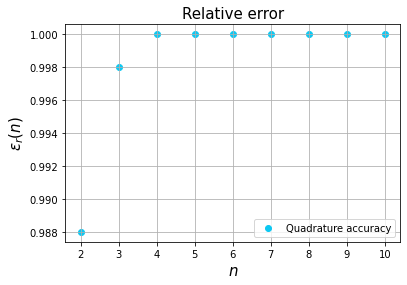

In [153]:
n_values = [2,3,4,5,6,7,8,9,10]
plt.title('Relative error', fontsize = 15)
plt.xlabel(r'$n$',fontsize = 15)
plt.ylabel(r'$\varepsilon_{r}(n)$',fontsize = 15)
plt.scatter(n_values,error_relative, color = '#0CC8F2',marker = 'o',label='Quadrature accuracy')
plt.legend()
plt.grid()

In [5]:
def triangular_superior(A):
    B = A.copy().astype(float)
    n = B.shape[0]
    for i in range(n): # recorrido por las columnas
        for j in range(i+1, n): # recorrido por las filas
            B[j] = ((B[j, i])/B[i, i]) * B[i] - B[j]
    
    return B

def matriz_diagonal(A_t):
  B = A_t.copy().astype(float)
  n = B.shape[0]
  for i in range(n - 1, -1, -1):
    for j in range(i - 1, -1, -1):
      B[j] = (B[j, i]/B[i, i]) * B[i] - B[j]

    B[i] = B[i] / B[i, i]
  return B

In [7]:
A = np.array([
    [2, 1, -1, 8],
    [-3, -1, 2, -11],
    [-2, 1, 2, -3]
])

A_t = triangular_superior(A)
D = matriz_diagonal(A_t)
print(D)

[[ 1.  0. -0.  2.]
 [ 0.  1.  0.  3.]
 [-0. -0.  1. -1.]]
